<a href="https://colab.research.google.com/github/aaaven/stylegan2encoder/blob/master/Tool_01_painting2face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone the repo and install tensorflow 1.14

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/aaaven/stylegan2encoder

import os
os.chdir('stylegan2encoder/')

!pip uninstall tensorflow-gpu
!pip uninstall tensorflow
!pip install tensorflow-gpu==1.14
!pip install keras==2.3.1

from IPython.display import clear_output
clear_output()

import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

## Specify your working directory (in google drive): 
1) pass in your google folder (for this project) path as prefix

2) within your 'prefix' folder you should have 'raw_images' with your images

3) and pass in your desired folder names for generated images (you dont have to create these folders in your gDrive) 

In [3]:
prefix = "/content/drive/MyDrive/0-Colab-Assets/painting2face/" #@param {type:"string"}
raw_images_foldername = 'raw_images/' #@param {type:"string"}
aligned_images_foldername = 'aligned_images/' #@param {type:"string"}
generated_images_foldername = 'generated_images/' #@param {type:"string"}
latent_representations_foldername = 'latent_representations/' #@param {type:"string"}

raw_images_path = prefix + raw_images_foldername
aligned_images_path = prefix + aligned_images_foldername
generated_images_path = prefix + generated_images_foldername
latent_representations_path = prefix + latent_representations_foldername

raw_images_path, aligned_images_path, generated_images_path, latent_representations_path

('/content/drive/MyDrive/0-Colab-Assets/painting2face/raw_images/',
 '/content/drive/MyDrive/0-Colab-Assets/painting2face/aligned_images/',
 '/content/drive/MyDrive/0-Colab-Assets/painting2face/generated_images/',
 '/content/drive/MyDrive/0-Colab-Assets/painting2face/latent_representations/')

## Show raw images in your selected google drvie path:

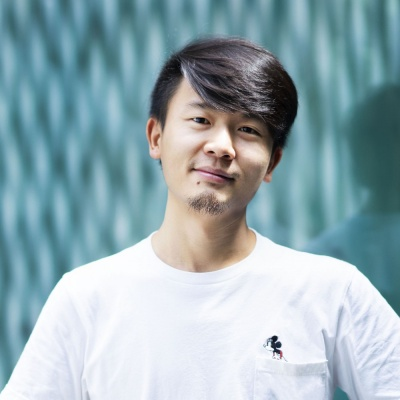

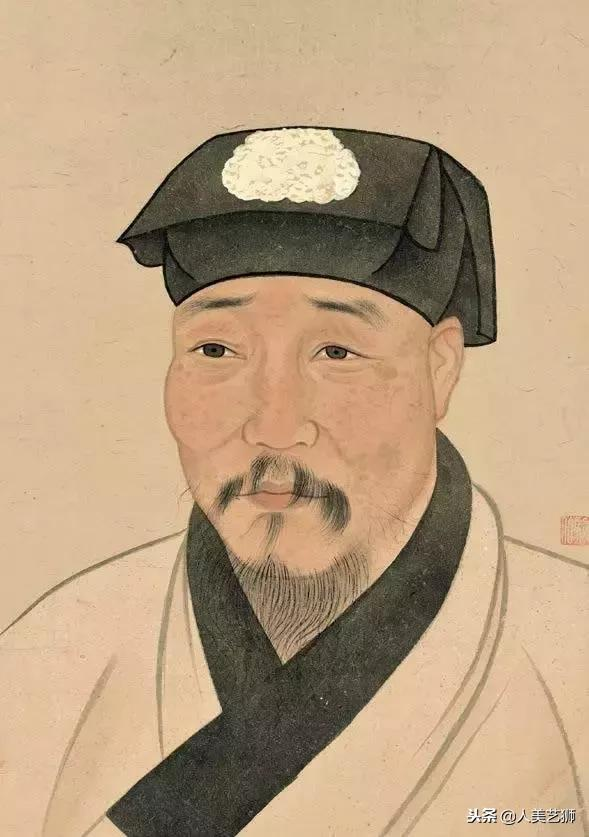

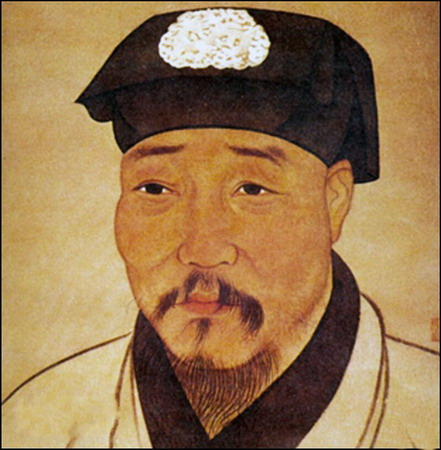

In [4]:
from google.colab.patches import cv2_imshow
import os
import cv2

ref_images = [os.path.join(raw_images_path, x) for x in os.listdir(raw_images_path)]
for y in ref_images:
  img = cv2.imread(y, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

## Generate/Crop faces, pre-processing your raw images:

In [5]:
#!/bin/bash          
raw_imgs_path = raw_images_path
!echo $raw_imgs_path

aligned_imgs_path = aligned_images_path
!echo $aligned_imgs_path

generated_imgs_path = generated_images_path
!echo $generated_imgs_path

latent_imgs_path = latent_representations_path
!echo $latent_imgs_path

/content/drive/MyDrive/0-Colab-Assets/painting2face/raw_images/
/content/drive/MyDrive/0-Colab-Assets/painting2face/aligned_images/
/content/drive/MyDrive/0-Colab-Assets/painting2face/generated_images/
/content/drive/MyDrive/0-Colab-Assets/painting2face/latent_representations/


In [12]:
!python align_images.py $raw_images_path $aligned_images_path

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

## Show pre-precessed "aligned" images (faces)

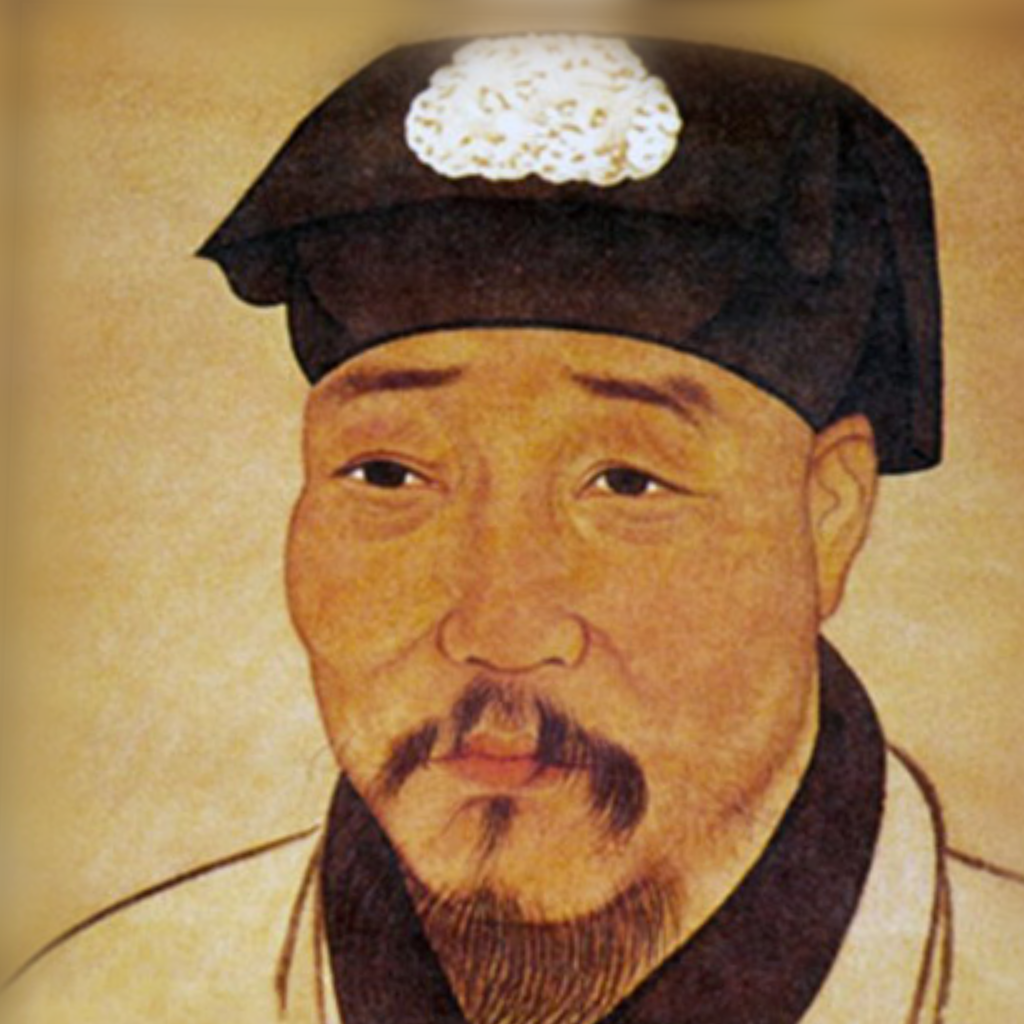

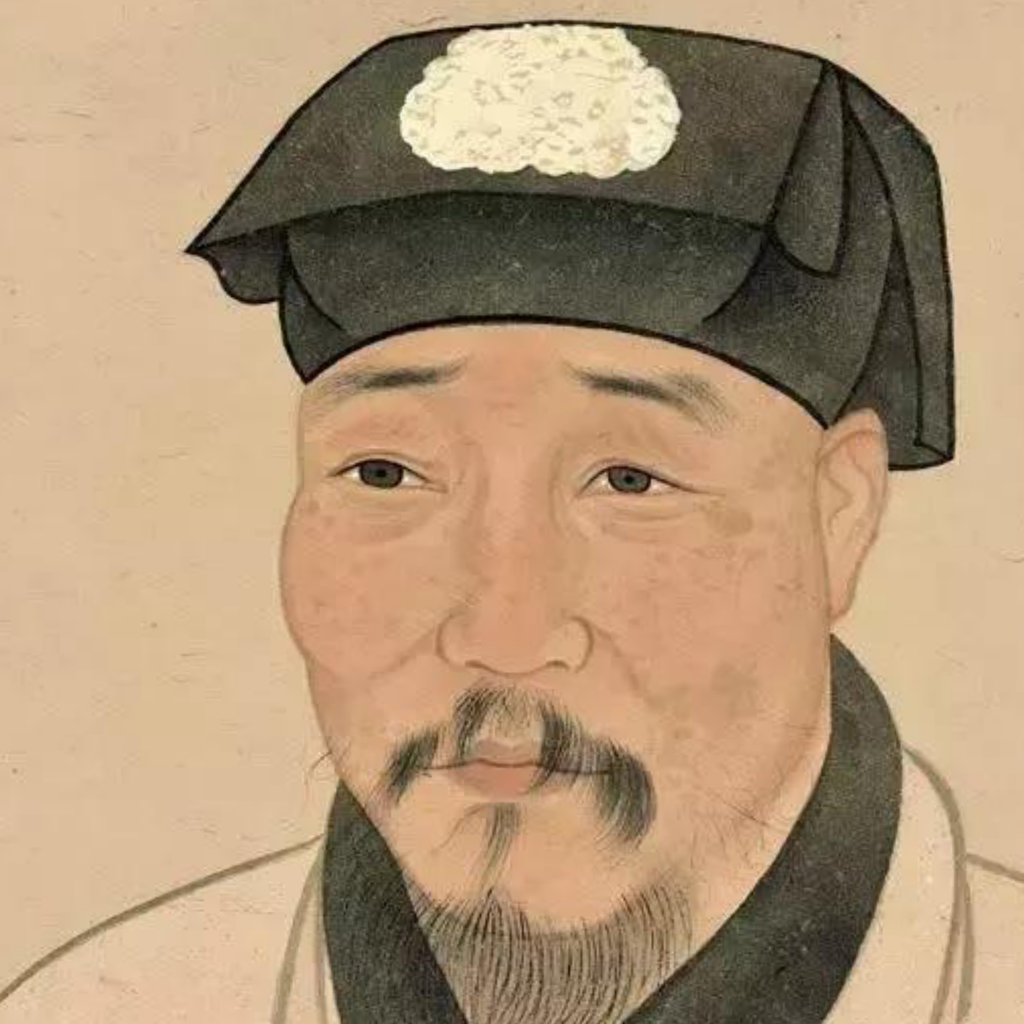

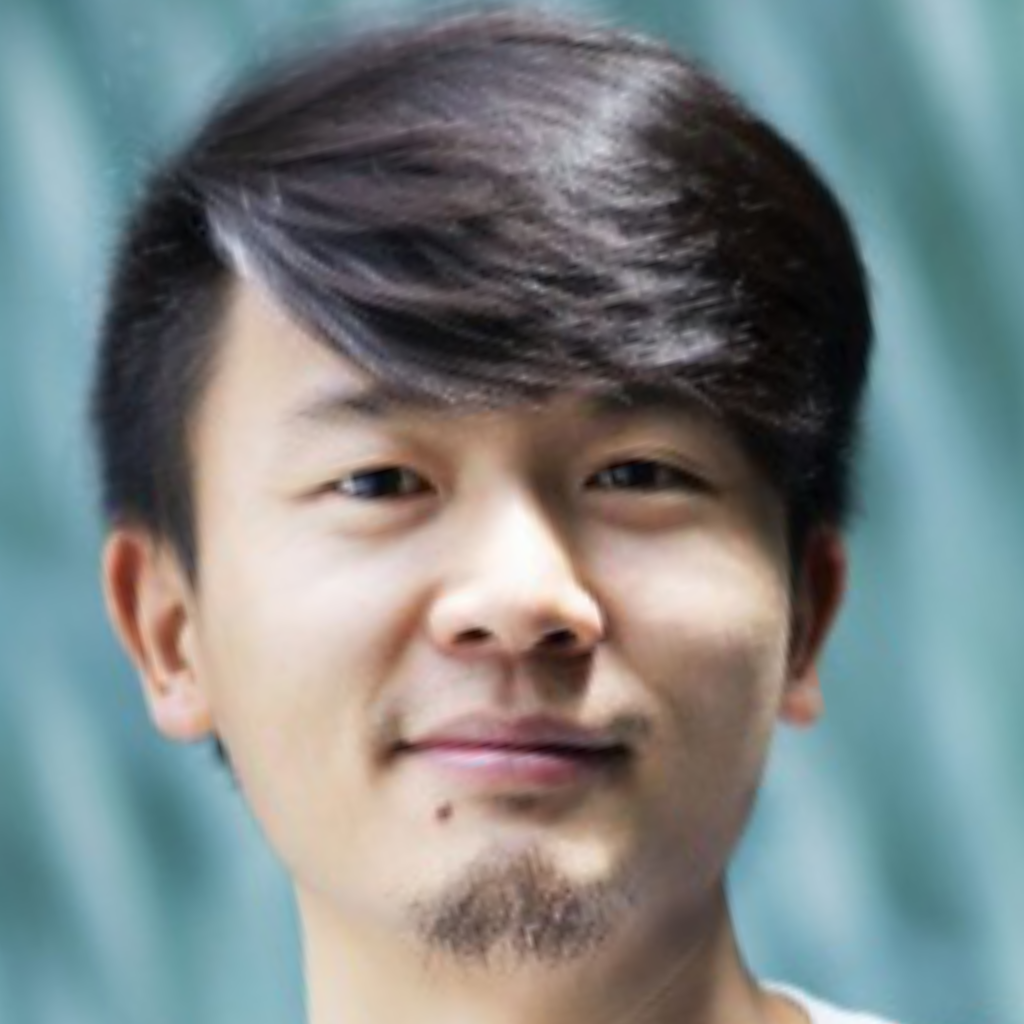

In [13]:
aligned_images = [os.path.join(aligned_images_path, x) for x in os.listdir(aligned_images_path)]
for y in aligned_images:
  img = cv2.imread(y, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

### Select Model & Load CheckPoints

In [14]:
network_name = "generator_yellow-stylegan2-config-f.pkl" #@param ['generator_baby-stylegan2-config-f.pkl', 'generator_model-stylegan2-config-f.pkl','generator_star-stylegan2-config-f.pkl','generator_wanghong_256px.pkl','generator_yellow-stylegan2-config-f.pkl']
p_network_path = prefix + 'networks/' + network_name

print("load model: " + network_name + " at path: " + p_network_path)


generated_filename_prefix = "yellow" #@param {type:"string"}


load model: generator_yellow-stylegan2-config-f.pkl at path: /content/drive/MyDrive/0-Colab-Assets/painting2face/networks/generator_yellow-stylegan2-config-f.pkl


## Generate Faces
This might take a while ...

In [15]:
#!/bin/bash          
network_path = p_network_path
generated_prefix = generated_filename_prefix

In [ ]:
!python encode_images.py $aligned_imgs_path $generated_imgs_path $latent_imgs_path --network_pkl $network_path --output_prefix $generated_prefix

## Show Generated Faces

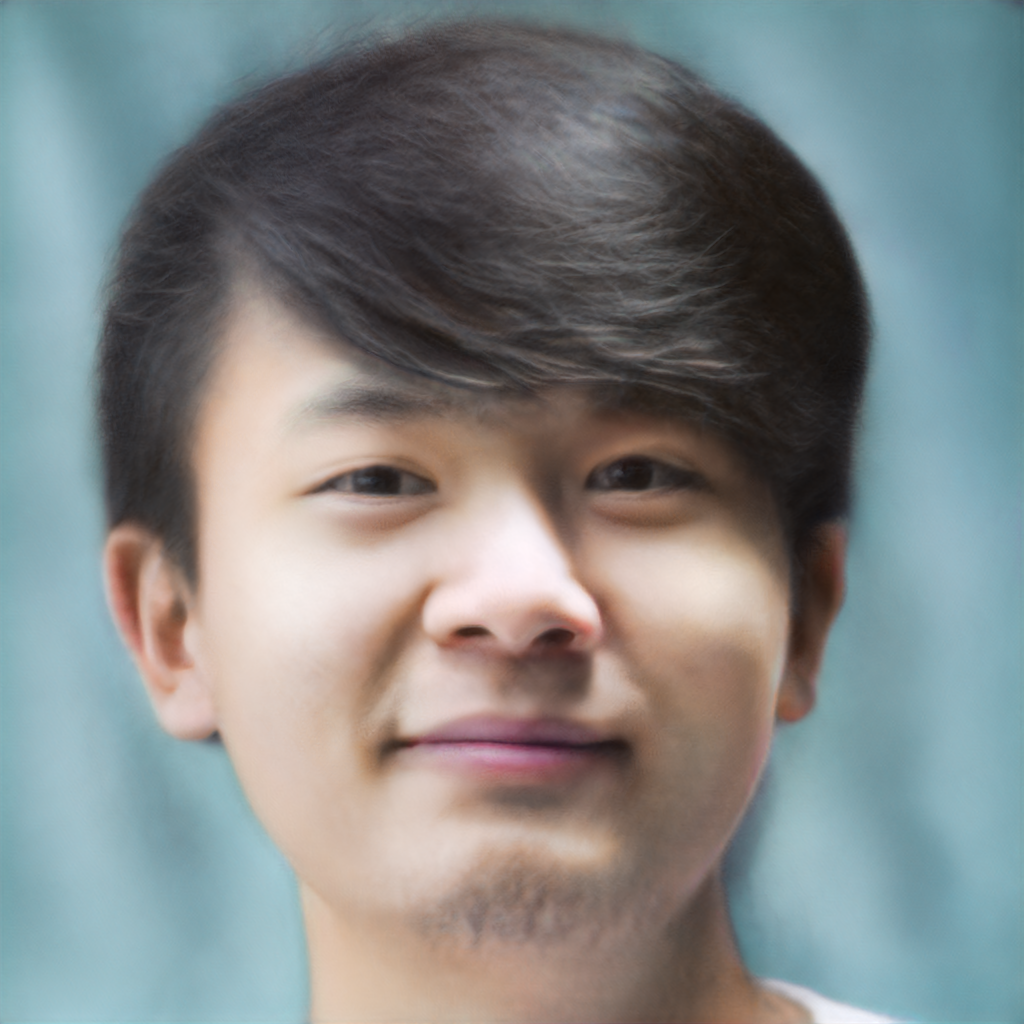

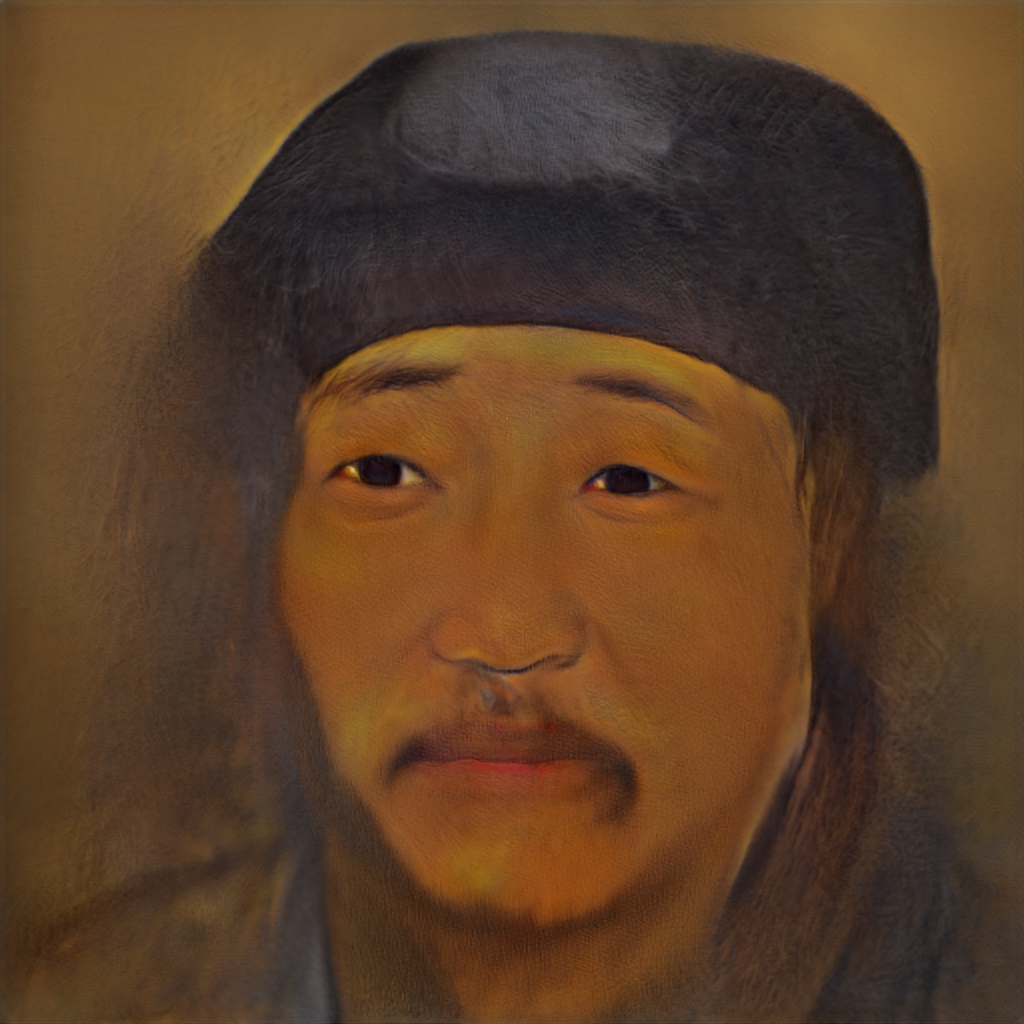

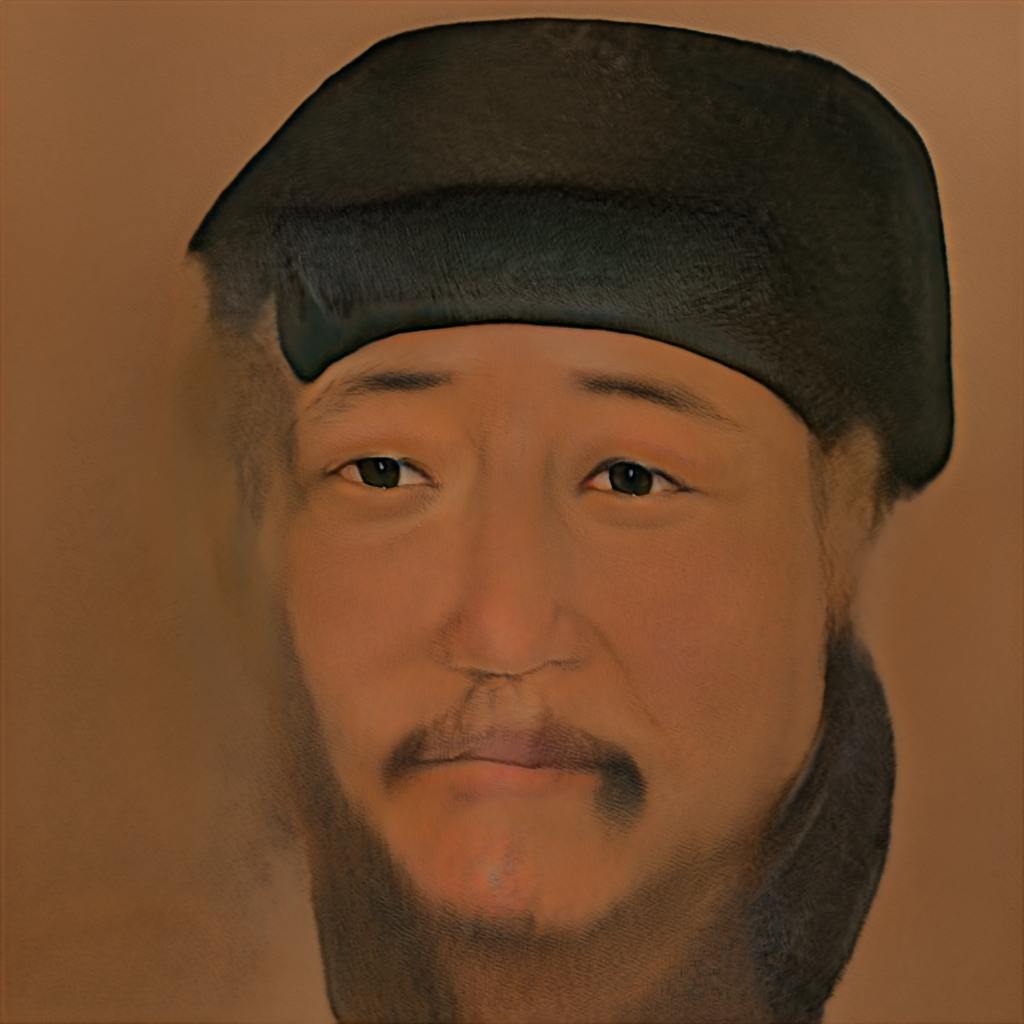

In [ ]:
generated_images = [os.path.join(generated_images_path, x) for x in os.listdir(generated_images_path)]
for y in generated_images:
  img = cv2.imread(y, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

In [ ]:
# !python project_images.py $aligned_images/ $generated_images/